### Importing the Dependencies

In [870]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

In [871]:
data_file_frame  = pd.read_csv('Car_details.csv', sep=',')
data_file_frame.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [872]:
data_file_frame = data_file_frame[['name','year','km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power','torque' ,'seats','selling_price']]

In [873]:
data_file_frame

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
1,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,320000
8123,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,135000
8124,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,382000
8125,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,290000


In [874]:
data_file_frame.drop('year', axis=1, inplace=True)
data_file_frame.drop('name', axis=1, inplace=True)
data_file_frame.drop('torque', axis=1, inplace=True)

In [875]:
data_file_frame.head(2)

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,370000
1,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,158000


In [876]:
data_file_frame['mileage'] = data_file_frame['mileage'].str.replace(r'kmpl', '')

In [877]:
data_file_frame['engine'] = data_file_frame['engine'].str.replace(r'CC', '')

In [878]:
data_file_frame['max_power'] = data_file_frame['max_power'].str.replace(r'bhp', '')

In [879]:
data_file_frame.isnull().sum()

km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
selling_price      0
dtype: int64

In [880]:
data_file_frame = data_file_frame[~data_file_frame.mileage.isnull()].copy()
data_file_frame.isnull().sum()

km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
selling_price    0
dtype: int64

In [881]:
data_file_frame.dtypes

km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
selling_price      int64
dtype: object

In [882]:
data_file_frame['owner'] = data_file_frame.owner.astype('category')
data_file_frame['transmission'] = data_file_frame.transmission.astype('category')
data_file_frame['fuel'] = data_file_frame.fuel.astype('category')
data_file_frame['seller_type'] = data_file_frame.seller_type.astype('category')

In [883]:
data_file_frame['owner'] = data_file_frame['owner'].cat.codes.astype('category')
data_file_frame['transmission'] = data_file_frame['transmission'].cat.codes.astype('category')
data_file_frame['fuel'] = data_file_frame['fuel'].cat.codes.astype('category')
data_file_frame['seller_type'] = data_file_frame['seller_type'].cat.codes.astype('category')

In [884]:
data_file_frame.dtypes

km_driven           int64
fuel             category
seller_type      category
transmission     category
owner            category
mileage            object
engine             object
max_power          object
seats             float64
selling_price       int64
dtype: object

In [885]:
data_file_frame.isnull().sum()

km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
selling_price    0
dtype: int64

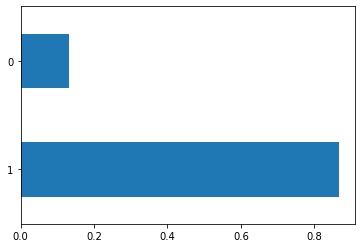

In [886]:
data_file_frame.transmission.value_counts(normalize=True)

#now converting the above into the respective plot
data_file_frame.transmission.value_counts(normalize=True).plot.barh()
plt.show()

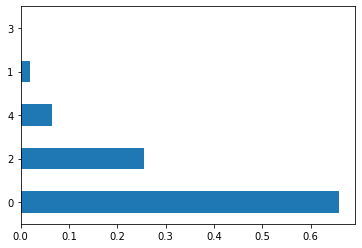

In [887]:
data_file_frame.owner.value_counts(normalize=True)

#now converting the above into the respective plot
data_file_frame.owner.value_counts(normalize=True).plot.barh()
plt.show()

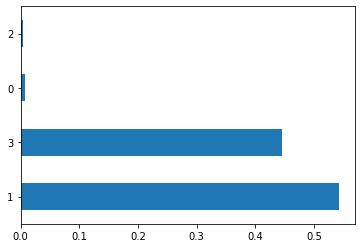

In [888]:
data_file_frame.fuel.value_counts(normalize=True)

#now converting the above into the respective plot
data_file_frame.fuel.value_counts(normalize=True).plot.barh()
plt.show()

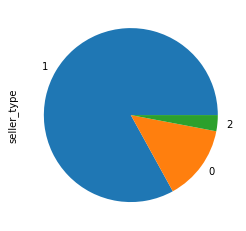

In [889]:
data_file_frame.seller_type.value_counts(normalize=True)

#now converting the above into the respective plot
data_file_frame.seller_type.value_counts(normalize=True).plot.pie()
plt.show()

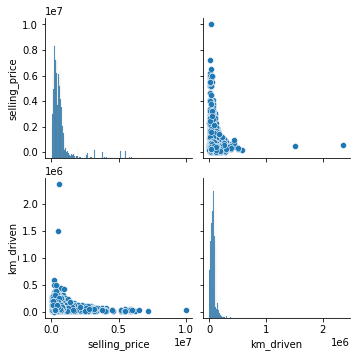

In [890]:
sns.pairplot(data = data_file_frame, vars=['selling_price','km_driven'])
plt.show()

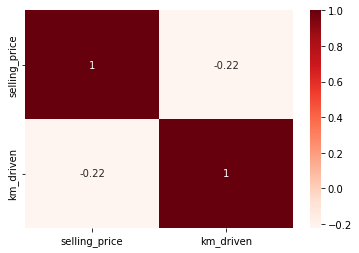

In [891]:
data_file_frame[['selling_price', 'km_driven']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data_file_frame[['selling_price', 'km_driven']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [892]:
data_file_frame.seats.describe()

count    7906.000000
mean        5.416772
std         0.959637
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

In [893]:
data_file_frame

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,120000,1,1,1,2,21.14,1498,103.52,5.0,370000
1,140000,3,1,1,4,17.7,1497,78,5.0,158000
2,127000,1,1,1,0,23.0,1396,90,5.0,225000
3,120000,3,1,1,0,16.1,1298,88.2,5.0,130000
4,45000,3,1,1,0,20.14,1197,81.86,5.0,440000
...,...,...,...,...,...,...,...,...,...,...
8122,110000,3,1,1,0,18.5,1197,82.85,5.0,320000
8123,119000,1,1,1,1,16.8,1493,110,5.0,135000
8124,120000,1,1,1,0,19.3,1248,73.9,5.0,382000
8125,25000,1,1,1,0,23.57,1396,70,5.0,290000


In [894]:
data_file_frame.max_power = pd.to_numeric(data_file_frame.max_power, errors='coerce')

In [895]:
data_file_frame.mileage = pd.to_numeric(data_file_frame.mileage, errors='coerce')

In [896]:
data_file_frame['mileage'] = data_file_frame['mileage'].multiply(100) 

In [897]:
data_file_frame['mileage'] = data_file_frame['mileage']/100

In [898]:
data_file_frame.engine = pd.to_numeric(data_file_frame.engine, errors='coerce')

In [899]:
data_file_frame.dtypes

km_driven           int64
fuel             category
seller_type      category
transmission     category
owner            category
mileage           float64
engine              int64
max_power         float64
seats             float64
selling_price       int64
dtype: object

In [900]:
X = data_file_frame.iloc[:, :-1].values

In [901]:
X

array([[1.2000e+05, 1.0000e+00, 1.0000e+00, ..., 1.4980e+03, 1.0352e+02,
        5.0000e+00],
       [1.4000e+05, 3.0000e+00, 1.0000e+00, ..., 1.4970e+03, 7.8000e+01,
        5.0000e+00],
       [1.2700e+05, 1.0000e+00, 1.0000e+00, ..., 1.3960e+03, 9.0000e+01,
        5.0000e+00],
       ...,
       [1.2000e+05, 1.0000e+00, 1.0000e+00, ..., 1.2480e+03, 7.3900e+01,
        5.0000e+00],
       [2.5000e+04, 1.0000e+00, 1.0000e+00, ..., 1.3960e+03, 7.0000e+01,
        5.0000e+00],
       [2.5000e+04, 1.0000e+00, 1.0000e+00, ..., 1.3960e+03, 7.0000e+01,
        5.0000e+00]])

In [902]:
y = data_file_frame.iloc[:, 9].values

In [903]:
y

array([370000, 158000, 225000, ..., 382000, 290000, 290000], dtype=int64)

In [904]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [905]:
X_train = np.nan_to_num(X_train)

In [906]:
y_train = np.nan_to_num(y_train)

In [907]:
# Fitting Multiple Linear Regression to the Training set
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [908]:
X_test

array([[3.5000e+04, 3.0000e+00, 1.0000e+00, ..., 1.1990e+03, 8.4000e+01,
        5.0000e+00],
       [1.1000e+04, 3.0000e+00, 0.0000e+00, ..., 1.5980e+03, 1.0350e+02,
        5.0000e+00],
       [1.1000e+05, 1.0000e+00, 1.0000e+00, ..., 1.3990e+03, 6.8000e+01,
        5.0000e+00],
       ...,
       [1.0150e+05, 1.0000e+00, 1.0000e+00, ..., 1.4980e+03, 1.0352e+02,
        5.0000e+00],
       [1.2000e+05, 3.0000e+00, 1.0000e+00, ..., 9.9800e+02, 6.8050e+01,
        5.0000e+00],
       [1.2000e+05, 1.0000e+00, 1.0000e+00, ..., 2.4990e+03, 7.2400e+01,
        1.0000e+01]])

In [909]:
X_test = np.nan_to_num(X_test)

In [910]:
y_pred = regression.predict(X_test)

In [911]:
df = pd.DataFrame(data=y_test, columns=['y_test'])
df['y_pred'] = y_pred

In [912]:
df

,y_test,y_pred
0,430000,4.991751e+05
1,645000,1.490460e+06
2,200000,1.515002e+05
3,800000,9.639180e+05
4,1500000,1.821902e+06
...,...,...
1577,450000,1.258156e+06
1578,250000,-4.704667e+04
1579,300000,6.744647e+05
1580,340000,9.899975e+04


In [913]:
data_file_frame.head(1)

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,120000,1,1,1,2,21.14,1498,103.52,5.0,370000


In [914]:
a = [126000,1,1,2,1,21,1410,100,5]
b = np.array(a)
b = b.reshape(1, -1)
y_pred_single_obs = regression.predict(b)
round(float(y_pred_single_obs), 2)

110106.18

In [915]:
r2_score(y_test, y_pred)

0.6520876105934362

In [916]:
import joblib
joblib.dump(regression, "flask_model.pkl")

['flask_model.pkl']

In [917]:
data_file_frame.columns

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'selling_price'],
      dtype='object')

In [920]:
driven = 122000
fuel = 1
seller_type = 0
transmission = 1
owner = 1
mileage = 150
engine = 1400
max_power = 100
seats = 5
y_predictors = [driven,fuel, seller_type, transmission, owner, mileage, engine, max_power, seats]
predictors_array = np.array(y_predictors)
pred_args_arr = predictors_array.reshape(1, -1)

regression_model = open('flask_model.pkl', 'rb')
machine_learning_model = joblib.load(regression_model)
model_prediction = machine_learning_model.predict(pred_args_arr)

round(float(model_prediction),2)

2687579.58

In [921]:
data_file_frame.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,120000,1,1,1,2,21.14,1498,103.52,5.0,370000
1,140000,3,1,1,4,17.70,1497,78.00,5.0,158000
2,127000,1,1,1,0,23.00,1396,90.00,5.0,225000
3,120000,3,1,1,0,16.10,1298,88.20,5.0,130000
4,45000,3,1,1,0,20.14,1197,81.86,5.0,440000
